<a href="https://colab.research.google.com/github/marcofavero3/dfProjetoUnicornio/blob/main/Projeto_AnaliseStartups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importação de libs

import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings#ignora avisos
warnings.filterwarnings('ignore') #ignorar alguns avisos


In [2]:
#ler arquivo csv

url = 'https://raw.githubusercontent.com/marcofavero3/dfProjetoUnicornio/main/Startups_in_2021_end.csv'
df = pd.read_csv(url)

#verificar dimensão

df.shape

(936, 8)

In [3]:
df.head() #comando head utilizado para verificar os 5 primeiros

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
df.columns #verifica as colunas do dataframe

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [5]:
#renomear as colunas

df.rename ( columns ={
    'Unnamed: 0' : 'ID',
    'Company' : 'Compania',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de entrada',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores'

}, inplace=True)

In [6]:
#verificar o tipo da informação

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               936 non-null    int64 
 1   Compania         936 non-null    object
 2   Valor ($)        936 non-null    object
 3   Data de entrada  936 non-null    object
 4   Pais             936 non-null    object
 5   Cidade           921 non-null    object
 6   Setor            936 non-null    object
 7   Investidores     935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [7]:
#verifico que possuo alguns campos nulos

df.isnull().sum()

#após rodar o comando df.snull() eu adiciono um sum() para verificar qntos nulos possuo

ID                  0
Compania            0
Valor ($)           0
Data de entrada     0
Pais                0
Cidade             15
Setor               0
Investidores        1
dtype: int64

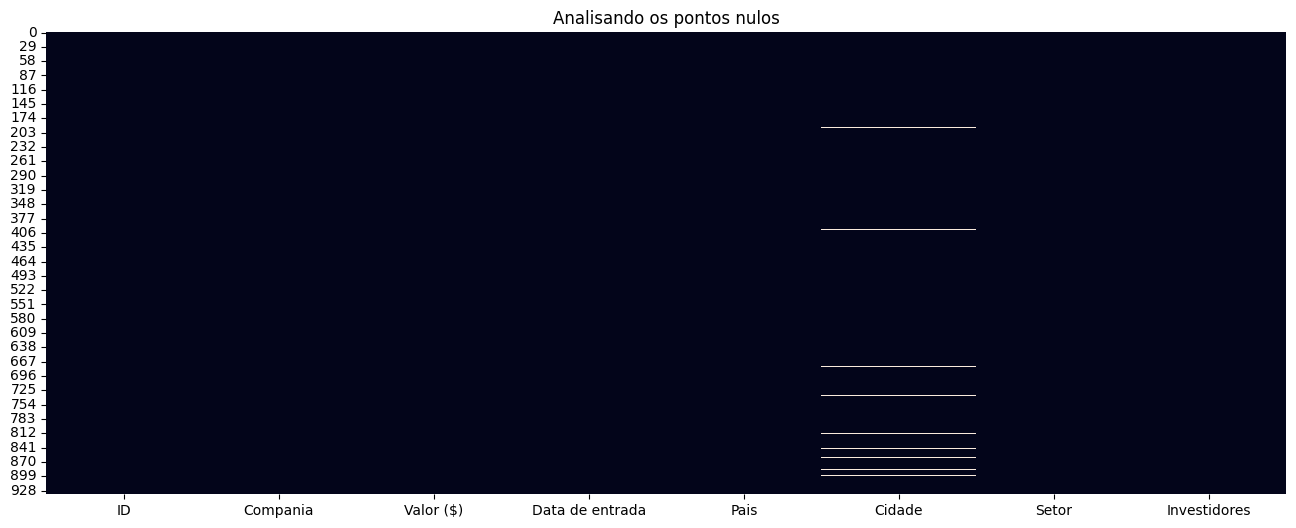

In [8]:
#visão grafica com mapa de calor, adicionando um ; após o código ele me retira toda a "borda" do gráfico

plt.figure (figsize=(16,6)) #altero o tamanho do meu gráfico
plt.title('Analisando os pontos nulos') #adiciono titulo para meu gráfico
sns.heatmap(df.isnull(), cbar=False); #ploto meu gráfico, adiciono o comando cbar=False para remover todas as barras laterais e deixar apenas o gráfico limpo

In [9]:
#Verificar os campos unicos
df.nunique()

ID                 936
Compania           935
Valor ($)          192
Data de entrada    589
Pais                47
Cidade             239
Setor               17
Investidores       920
dtype: int64

In [10]:
#verificar o que tem em setor
df['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [11]:
#verificar o setor por rank dos que mais aparecem

df['Setor'].value_counts( normalize=True) #adiciono o comando normalize para verificar a %


Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

<BarContainer object of 17 artists>

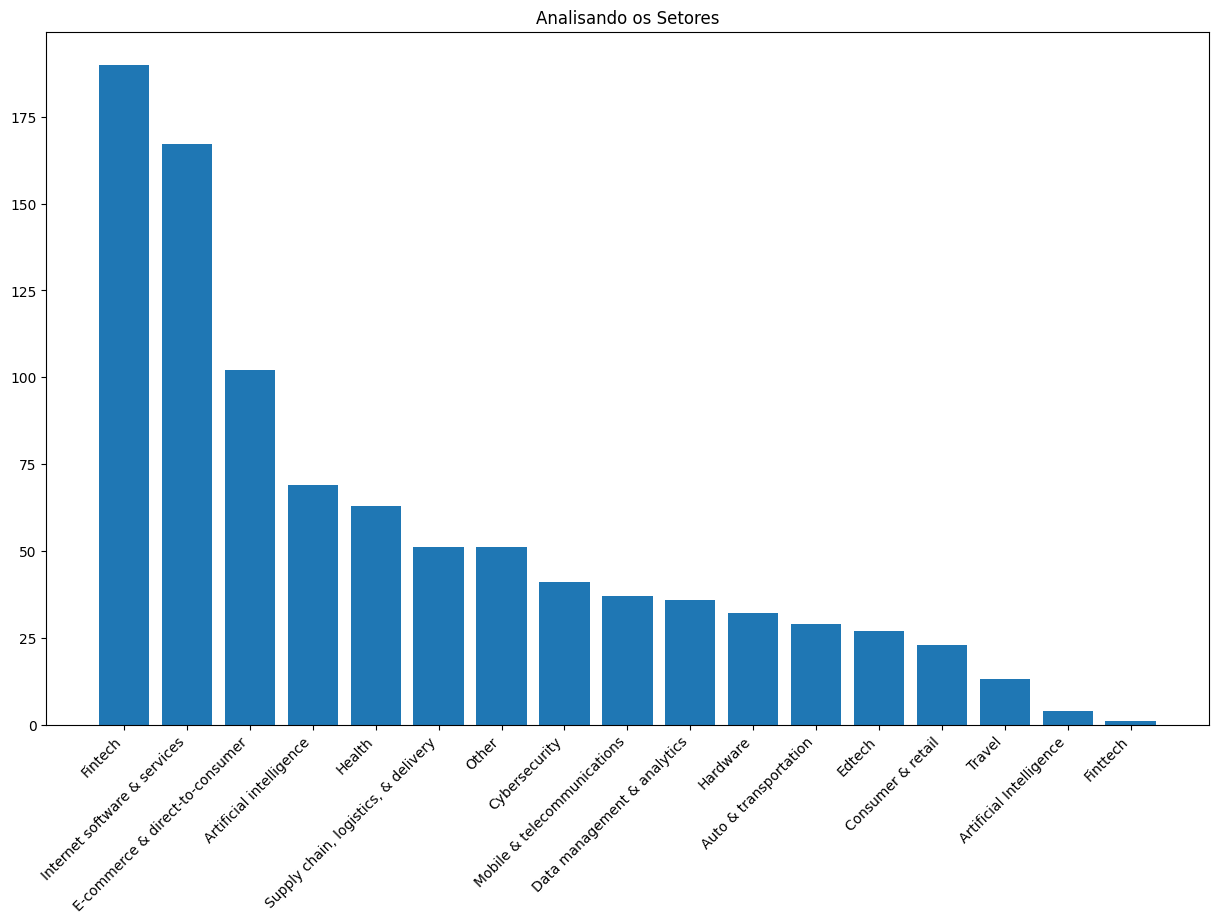

In [12]:
#plotando o gŕafico pela primeira vez
plt.figure(figsize=(15,9)) #tamanho do gráfico
plt.title('Analisando os Setores') #titulo do gráfico
plt.xticks(rotation=45 ,ha='right') #rotação de 45 graus para a direita
plt.bar(df['Setor'].value_counts().index, df['Setor'].value_counts()) #comando para plotar o gráfico de barras


In [13]:
#verificando os paises
df['Pais'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [14]:
df['Pais'].value_counts(normalize=True)

United States           0.509615
China                   0.180556
India                   0.054487
United Kingdom          0.039530
Germany                 0.024573
Israel                  0.022436
France                  0.020299
Canada                  0.016026
Brazil                  0.016026
South Korea             0.011752
Singapore               0.011752
Hong Kong               0.007479
Japan                   0.006410
Australia               0.006410
Mexico                  0.005342
Netherlands             0.005342
Indonesia               0.004274
Spain                   0.004274
Sweden                  0.004274
Switzerland             0.004274
Ireland                 0.003205
United Arab Emirates    0.003205
Norway                  0.003205
Belgium                 0.002137
Thailand                0.002137
Denmark                 0.002137
Philippines             0.002137
Finland                 0.002137
Colombia                0.002137
South Africa            0.002137
Turkey    

In [15]:
analise = round(df['Pais'].value_counts(normalize=True) * 100, 1)

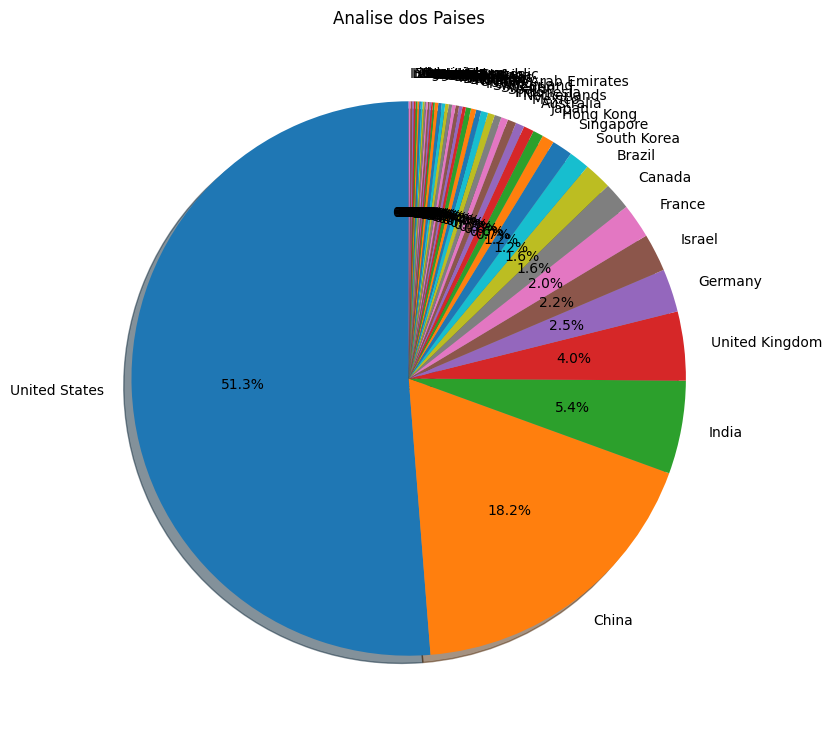

In [16]:
#NÃO RECOMENDO GRÁFICO DE PIZZA, APENAS UTILIZEI PARA DEMONSTRAR OS PAISES
plt.figure(figsize=(15,9))
plt.title('Analise dos Paises')
plt.pie(
    analise,
    labels=analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);


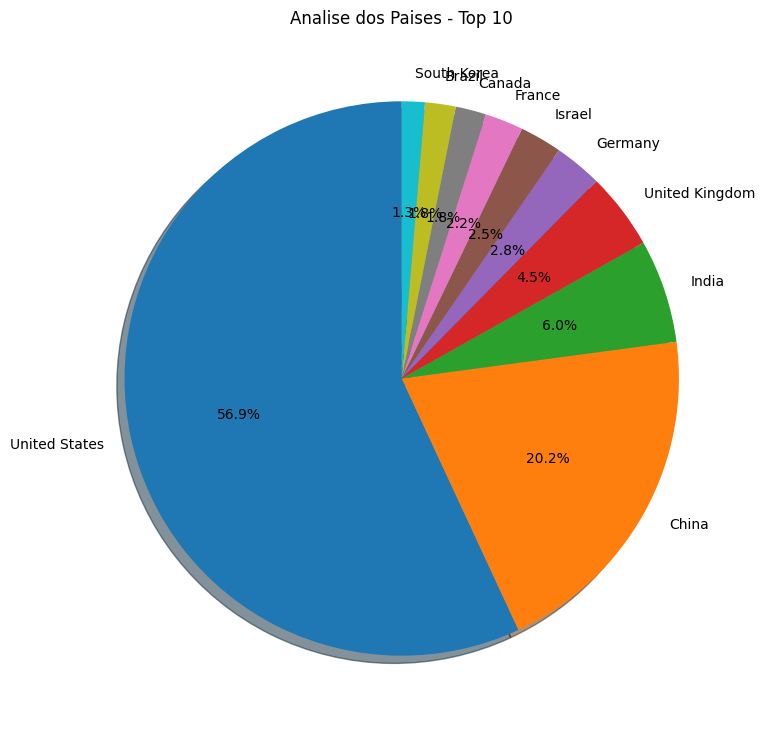

In [17]:
#TOP 10 DO GRÁFICO DE PIZZA
plt.figure(figsize=(15,9))
plt.title('Analise dos Paises - Top 10')
plt.pie(
    analise.head(10),
    labels=analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);


In [18]:
analise.index[0:10]

Index(['United States', 'China', 'India', 'United Kingdom', 'Germany',
       'Israel', 'France', 'Canada', 'Brazil', 'South Korea'],
      dtype='object')

In [19]:
# Conversão para Data
df['Data de entrada'] = pd.to_datetime( df['Data de entrada'] )

df['Data de entrada'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de entrada, dtype: datetime64[ns]

In [20]:
#ADICIONANDO MES E ANO
df['Mes'] = pd.DatetimeIndex( df['Data de entrada'] ).month
df['Ano'] = pd.DatetimeIndex( df['Data de entrada'] ).year

df.head()

,ID,Compania,Valor ($),Data de entrada,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [21]:
#TABELA ANALITICA MOSTRANDO PAIS ANO E MES
df_agrupado = df.groupby(by=['Pais','Ano','Mes']).count()['ID'].reset_index()
df_agrupado

,Pais,Ano,Mes,ID
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2
...,...,...,...,...
373,United States,2021,10,26
374,United States,2021,11,30
375,United States,2021,12,8
376,"United States,",2021,9,1


In [22]:
#PESQUISANDO COM O LOC PELO PAIS BRASIL
df_agrupado.loc[
    df_agrupado['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,ID
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [28]:
# Transformando a coluna Valor

#df['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') )  #1 COMANDO
#pd.to_numeric (df['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') )) #2- comando
df['Valor ($)'] = pd.to_numeric( df['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) ) #FAZENDO O REPLACE DO VALOR COM $ PARA O ' '

df.head()

,ID,Compania,Valor ($),Data de entrada,Pais,Cidade,Setor,Investidores,Mes,Ano,Valor
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017,140.0
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012,100.3
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014,95.0
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011,45.6
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018,40.0


In [34]:
#Filtrar por pais e valor, analisando quais paises possui o maior valor
df_por_pais = df.groupby(by=['Pais']).sum()['Valor ($)'].reset_index()
df_por_pais.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [39]:
#Filtrando os paises do maior para o menor
df_por_pais = df_por_pais.sort_values('Valor ($)', ascending=False)


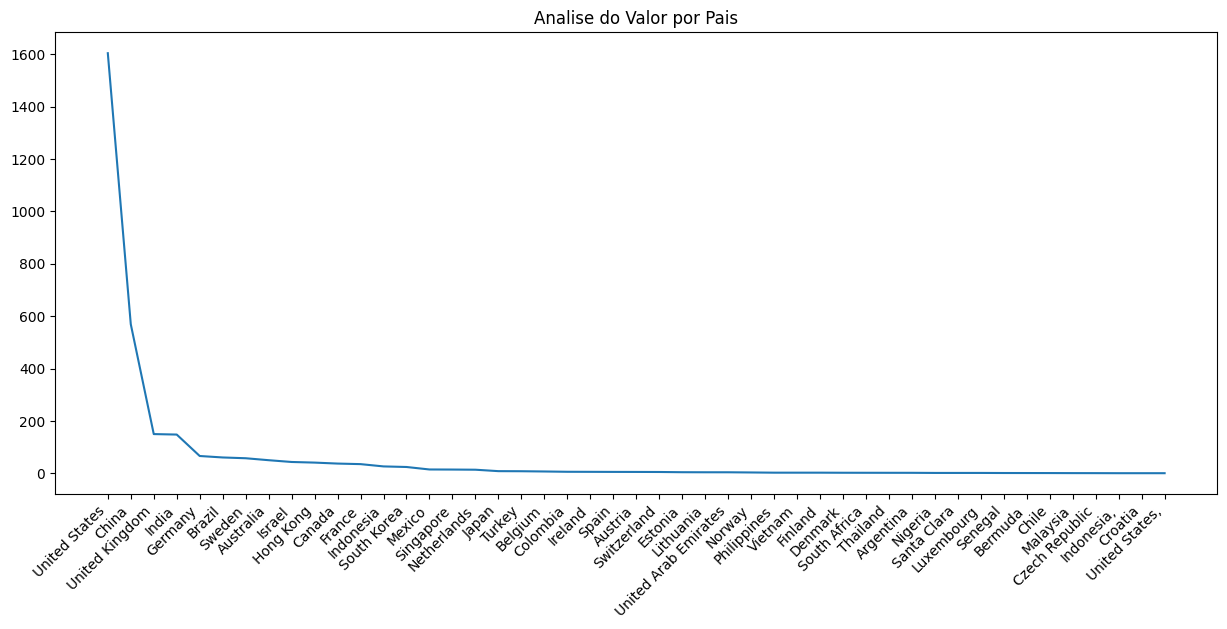

In [40]:
#PLOTAGEM DO GRAFICO COM TODOS PAISES E SEUS VALORES

plt.figure( figsize=(15,6) )
plt.plot( df_por_pais['Pais'], df_por_pais['Valor ($)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');